## We have data from an Israeli Bank. And it's a portfolio of student loans. The job is to estimate probability of defaults (PD). Secondly, we should assess our accuracy power of our model
## Often times in credit risk, estimating PD is more important than EAD or LGD. So let's dive in

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('C:/Users/adib-/Downloads/bank.csv')
df

,loan_applicant_id,age,education,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y
0,191,44,university.degree,10,20,192,12.116645,14.377313,8.886645,1
1,34318,34,high.school,3,18,57,14.264229,5.137880,2.992730,0
2,14932,45,university.degree,14,24,212,7.285681,10.460306,4.985339,0
3,2776,33,illiterate,12,5,418,11.386272,3.040189,44.554429,1
4,11915,20,basic,4,19,122,28.418494,14.560450,20.110112,0
...,...,...,...,...,...,...,...,...,...,...
41183,33354,49,high.school,4,4,114,12.296137,4.868954,9.148643,0
41184,38993,52,professional.course,13,16,178,21.421341,23.210634,14.919353,0
41185,1765,42,university.degree,18,15,264,9.821804,12.290464,13.639099,1
41186,32593,21,university.degree,12,24,56,23.998647,8.108453,5.330789,0


In [3]:
### Dropping All Missing Values in our dataframe


df=df.dropna()

In [4]:
df.shape

(41188, 10)

In [5]:
# Some stats
df.groupby('education').mean()

,loan_applicant_id,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y
education,,,,,,,,,
basic,20715.466902,37.926138,13.452422,15.372353,139.645291,16.259856,9.623007,13.578631,0.112558
high.school,20496.678068,38.027093,13.585877,15.314944,139.625598,16.192938,9.512649,13.766241,0.112296
illiterate,20381.154156,38.010513,13.483130,15.424694,139.980562,16.270517,9.645607,13.962909,0.116137
professional.course,20543.622328,38.135690,13.641278,15.310860,138.129981,16.138116,9.343046,13.543704,0.109208
university.degree,20828.736579,37.941197,13.585645,15.501012,141.127128,16.258214,9.758195,13.936749,0.113082


In [6]:
df['age'].loc[df['y']==0].describe()

count    36548.000000
mean        37.975676
std         10.686491
min         20.000000
25%         29.000000
50%         38.000000
75%         47.000000
max         56.000000
Name: age, dtype: float64

In [7]:
df.groupby('y').mean()

,loan_applicant_id,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt
y,,,,,,,,
0,22914.5,37.975676,13.447521,15.497729,128.300646,15.514879,7.810996,12.127154
1,2320.5,38.261207,14.356034,14.500000,229.554957,21.810028,23.489629,26.605214


## From this we can already see that people with higher debt-to-income, credit card debt (almost 3 times higher than no defaulting poeple) and other debt have defaults

C:\Users\adib-\AppData\Local\Temp\ipykernel_15576\107559088.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df['household_income'].loc[df['y'] == 0],shade=True,label='No Default')
C:\Users\adib-\AppData\Local\Temp\ipykernel_15576\107559088.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df['household_income'].loc[df['y'] == 1],shade=True,label='Default')


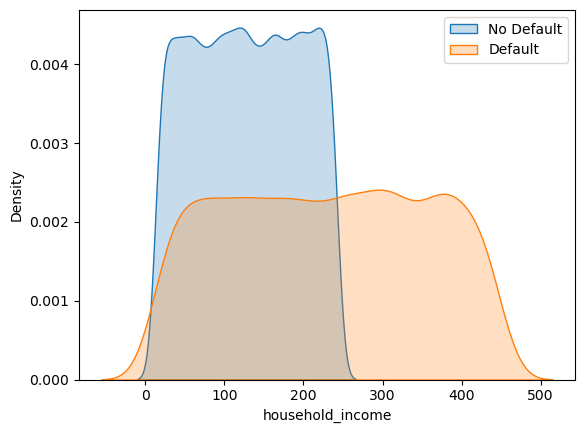

In [8]:
sns.kdeplot( df['household_income'].loc[df['y'] == 0],shade=True,label='No Default')
sns.kdeplot( df['household_income'].loc[df['y'] == 1],shade=True,label='Default')
plt.legend()
plt.show()
    

<AxesSubplot: xlabel='y', ylabel='count'>

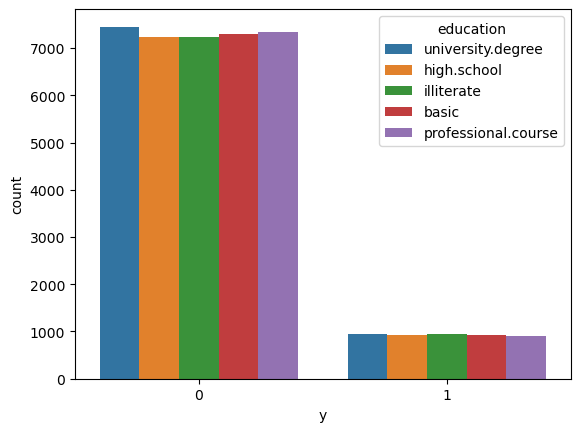

In [9]:
sns.countplot(x='y',data=df,hue='education')
## Just wanted to see if any education category means that they have high defaults than some other groups. Doesn't seem like it

In [17]:
## ML Models cannot work with strings. We need to convert all of them to dummies and merge them with the existing one. And then finally remove the string ones

pd.get_dummies(df['education'])
df=pd.concat([df,pd.get_dummies(df['education'])],axis=1)

In [18]:
df_final=df.drop(columns=['loan_applicant_id','education'])
df_final

,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y,basic,high.school,illiterate,professional.course,university.degree
0,44,10,20,192,12.116645,14.377313,8.886645,1,0,0,0,0,1
1,34,3,18,57,14.264229,5.137880,2.992730,0,0,1,0,0,0
2,45,14,24,212,7.285681,10.460306,4.985339,0,0,0,0,0,1
3,33,12,5,418,11.386272,3.040189,44.554429,1,0,0,1,0,0
4,20,4,19,122,28.418494,14.560450,20.110112,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,49,4,4,114,12.296137,4.868954,9.148643,0,0,1,0,0,0
41184,52,13,16,178,21.421341,23.210634,14.919353,0,0,0,0,1,0
41185,42,18,15,264,9.821804,12.290464,13.639099,1,0,0,0,0,1
41186,21,12,24,56,23.998647,8.108453,5.330789,0,0,0,0,0,1


In [19]:
from sklearn.model_selection import train_test_split
X = df_final.loc[:, df_final.columns != 'y']
y = df_final.loc[:, df_final.columns == 'y']

from imblearn.over_sampling import SMOTE

## SMOTE is an oversampling technique. There are also other ways to oversample but this is one of them. It's kind of bootstrapping but we are creating this because we need to have a balanced data set
## Without a balanced data, it would be unfair. If you give 900 oranges and 100 apples and you want the program to predict what you will have later. It can't do it. It is only fair you give it 500,500 to train.

os = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
columns = X_train.columns

os_df_X,os_df_y = os.fit_resample(X_train, y_train)
os_df_X = pd.DataFrame(data=os_df_X,columns=columns )
os_df_y = pd.DataFrame(data=os_df_y,columns=['y'])

In [20]:
df_final_vars=df_final.columns.values.tolist()

In [21]:
y=['y']
X=[i for i in df_final_vars if i not in y]

In [22]:
## This is for ranking which variables are important for us to model our final variables. If you have domain knowledge you use that, and forget this step
## If not, just like Entropy or Gini Impurity, Recursive Feature Elimination works in the same way. Letting the program handle it.

from sklearn.feature_selection import RFE

In [26]:
logreg=LogisticRegression(max_iter=10000) ## Keep an eye out if your model to fails to converge. I tried with default setting and it did not converge. So I increase the number of iterations

In [27]:
rfe=RFE(logreg,n_features_to_select=9)
rfe=rfe.fit(os_df_X, os_df_y.values.ravel())

In [28]:
rfe.ranking_

array([4, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1])

In [29]:
df_X1 = pd.DataFrame({'Feature': os_df_X.columns,'Importance': rfe.ranking_}) 
df_X1.sort_values(by=['Importance'])

,Feature,Importance
2,years_at_current_address,1
3,household_income,1
4,debt_to_income_ratio,1
6,other_debt,1
7,basic,1
8,high.school,1
9,illiterate,1
10,professional.course,1
11,university.degree,1
1,years_with_current_employer,2


In [30]:
cols=[]
for i in range (0, len(df_X1['Importance'])):
 if df_X1['Importance'][i] == 1:
    cols.append(df_X1['Feature'][i])
print(cols)

## Leaving out the rest. Do remember again, about the trade off between model complexity and fitting.

['years_at_current_address', 'household_income', 'debt_to_income_ratio', 'other_debt', 'basic', 'high.school', 'illiterate', 'professional.course', 'university.degree']


In [31]:
X=os_df_X[cols]
y=os_df_y['y']

In [32]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.271000
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                48912
Model:                          Logit   Df Residuals:                    48903
Method:                           MLE   Df Model:                            8
Date:                Sun, 01 Oct 2023   Pseudo R-squ.:                  0.6090
Time:                        07:59:26   Log-Likelihood:                -13255.
converged:                       True   LL-Null:                       -33903.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
years_at_current_address    -0.0015      0.002     -0.909      0.363      -0.005

In [33]:
pvalues=pd.DataFrame(result.pvalues,columns={'p_value'})
pvalues
## All of them are significant. Yay!

,p_value
years_at_current_address,3.634119e-01
household_income,0.000000e+00
debt_to_income_ratio,0.000000e+00
other_debt,1.062421e-184
basic,0.000000e+00
high.school,0.000000e+00
illiterate,0.000000e+00
professional.course,0.000000e+00
university.degree,0.000000e+00


In [35]:
## Although we got our estimates, we want to see how good is it in terms of accuracy. That logit model doesn't give us that for the testing. So we use the following method as we do training-testing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [36]:
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy of logistic regression classifier on test set: 0.91


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7867  162]
 [1349 6763]]


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      8029
           1       0.98      0.83      0.90      8112

    accuracy                           0.91     16141
   macro avg       0.92      0.91      0.91     16141
weighted avg       0.92      0.91      0.91     16141

